In [1]:
#%matplotlib notebook
import numpy as np
import seaborn as sns
# グラフ化用
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import datetime
import pytz

In [2]:
grid_number = 10
step_count = 10000
s_up = 1
s_down = -1
J_kt = np.array([1.0, 0.5, 0.25])
B = 0

In [3]:
np.random.seed(100)
# 1と-1のいずれかを選択した行列を用意
state_m0 = np.random.choice([s_down, s_up], (grid_number, grid_number))
state_m0

array([[-1, -1,  1,  1,  1,  1, -1, -1, -1, -1],
       [-1,  1, -1, -1, -1, -1,  1, -1, -1,  1],
       [-1,  1, -1, -1, -1,  1,  1,  1, -1, -1],
       [ 1, -1, -1,  1,  1,  1,  1,  1, -1, -1],
       [ 1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
       [ 1,  1, -1, -1,  1,  1, -1,  1, -1,  1],
       [ 1,  1, -1, -1,  1, -1, -1,  1,  1,  1],
       [-1, -1, -1, -1, -1, -1,  1, -1,  1, -1],
       [ 1, -1, -1,  1,  1, -1, -1, -1,  1,  1],
       [ 1,  1, -1, -1,  1,  1, -1, -1,  1, -1]])

<AxesSubplot:>

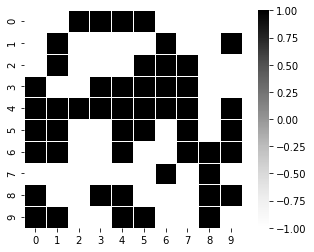

In [4]:
fig_1 = plt.figure()
ax_1 = fig_1.add_subplot(1, 1, 1)
sns.heatmap(state_m0, cmap="Greys", vmin=-1, vmax=1, square=True, linewidths=0.5, ax = ax_1)

In [5]:
time = datetime.datetime.now(pytz.timezone('Asia/Tokyo'))
#(年、月、日付、時、分、秒、マイクロ秒)
#見やすい形に変換
time = time.strftime(f'%m%d_monte_1129kadai_0_{J_kt}.png')
# 図の保存
fig_1.savefig(time, facecolor = fig_1.get_facecolor())

### https://it-mayura.com/python/pn012/#:~:text=%E3%81%8C%E3%81%82%E3%82%8B%E5%A0%B4%E5%90%88-,numpy.,%E5%9B%B2%E3%82%80%E3%81%93%E3%81%A8%E3%81%A7%E5%8F%AF%E8%83%BD%E3%81%A7%E3%81%99.

In [6]:
# Up Right Down Left # 時計回り
u_r_d_l = [(-1, 0), (0, 1), (1, 0), (0, -1)]
def get_index(location_num, u_r_d_l):
    index_array = location_num + np.array(u_r_d_l)
    # 周期境界条件
    index_array = np.where(index_array==-1, grid_number-1, index_array)
    index_array = np.where(index_array==grid_number, 0, index_array)
    return index_array

In [7]:
def state_update(state_m1, grid_number, J_kt, B):
    i = np.random.randint(grid_number)
    j = np.random.randint(grid_number)
    location = (i, j)
    index_array = get_index(location, u_r_d_l)
    g = np.sum([state_m1[index_array[k, 0], index_array[k, 1]] for k in range(index_array.shape[0])])
    alpha = -2*state_m1[i, j]*(J_kt*g + B)
    if(np.random.rand() < np.exp(alpha)):
        state_m1[i, j] = -state_m1[i, j]
    return state_m1.copy()

In [8]:
state_m1 = state_m0.copy()

In [9]:
state_list_0 = [state_update(state_m1, grid_number, J_kt[0], B) for l in range(step_count)]

In [10]:
state_m1 = state_m0.copy()

In [11]:
state_list_1 = [state_update(state_m1, grid_number, J_kt[1], B) for l in range(step_count)]

In [12]:
state_m1 = state_m0.copy()

In [13]:
state_list_2 = [state_update(state_m1, grid_number, J_kt[2], B) for l in range(step_count)]

In [14]:
state_all = [(state_list_0), (state_list_1), (state_list_2)]

### https://ja.stackoverflow.com/questions/17870/python%E3%81%A7for%E3%83%AB%E3%83%BC%E3%83%97%E3%82%92%E4%BD%BF%E3%81%A3%E3%81%A6%E3%83%AA%E3%82%B9%E3%83%88%E3%82%92%E7%94%9F%E6%88%90%E3%81%99%E3%82%8B%E3%81%A8-%E3%81%99%E3%81%B9%E3%81%A6%E3%81%AE%E8%A6%81%E7%B4%A0%E3%81%8C%E5%90%8C%E3%81%98%E5%80%A4%E3%81%AB%E3%81%AA%E3%82%8B

<AxesSubplot:>

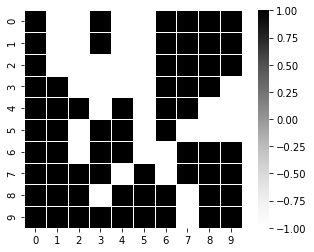

In [15]:
fig_2 = plt.figure()
ax_2 = fig_2.add_subplot(1, 1, 1)
sns.heatmap(state_m1, cmap = "Greys", vmin=-1, vmax=1, square=True, linewidths=0.5, ax=ax_2)

In [16]:
### 散布図でも行けそう（3Dとかはそうしたほうがいい）

In [17]:
time = datetime.datetime.now(pytz.timezone('Asia/Tokyo'))
#(年、月、日付、時、分、秒、マイクロ秒)
#見やすい形に変換
time = time.strftime(f'%m%d_monte_1129kadai_fin_{J_kt}.png')
# 図の保存
fig_2.savefig(time, facecolor = fig_2.get_facecolor())

In [18]:
state_all_sum = [[np.sum(state_all[i][j]) for j in range(grid_number**2-1, step_count, 100)] for i in range(len(state_all))]
state_all_sum_0 = np.sum(state_m0)
[state_all_sum[i].insert(0, state_all_sum_0) for i in range(len(state_all_sum))]
step_count_list = [i/100 for i in range(step_count+100) if (i%100==0)]

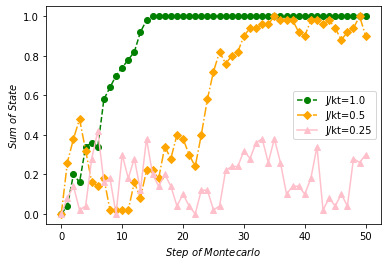

In [26]:
fig_3 = plt.figure()
ax_3 = fig_3.add_subplot(1, 1, 1)
ax_3.plot(step_count_list, np.array(np.abs(state_all_sum[0]))/grid_number**2, '--', marker="o", label=f'J/kt={J_kt[0]}', color='green')
ax_3.plot(step_count_list, np.array(np.abs(state_all_sum[1]))/grid_number**2, '-.', marker="D", label=f'J/kt={J_kt[1]}', color='orange')
ax_3.plot(step_count_list, np.array(np.abs(state_all_sum[2]))/grid_number**2, '-', marker="^", label=f'J/kt={J_kt[2]}', color='pink')
ax_3.set_xlabel(r"$Step \ of \ Montecarlo$")
ax_3.set_ylabel(r"$Sum \ of \ State$")
ax_3.legend(loc='best')

In [27]:
time = datetime.datetime.now(pytz.timezone('Asia/Tokyo'))
#(年、月、日付、時、分、秒、マイクロ秒)
#見やすい形に変換
time = time.strftime('%m%d_monte_1206kadai.png')
# 図の保存
fig_3.savefig(time, facecolor = fig_3.get_facecolor())

### アニメーションの作成

In [113]:
def anim_update(frame_count):
    [ax_4[i].clear() for i in range(len(state_all))]
    [ax_4[i].imshow(state_all[i][frame_count], cmap='Greys', aspect='equal') for i in range(len(state_all))]
    [ax_4[i].set_title(f"J/kT={J_kt[i]}", loc = 'center') for i in range(len(state_all))]
    fig_4.suptitle('frame count=' + str(frame_count))

<IPython.core.display.Javascript object>


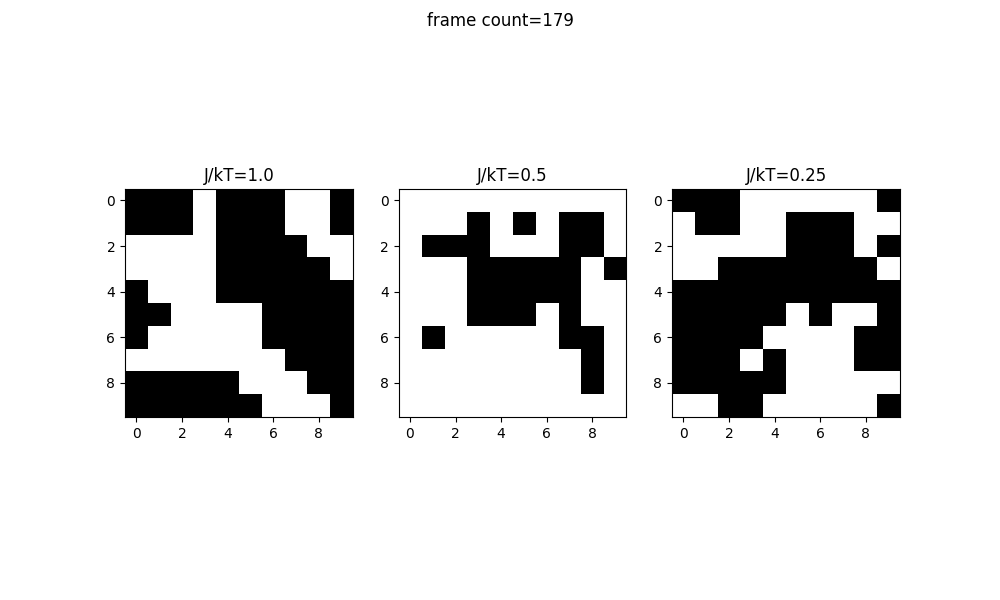

In [114]:
fig_4 = plt.figure(figsize = (10, 6))
ax_4 = [fig_4.add_subplot(1, 3, int(i+1)) for i in range(len(state_all))]
#[ax_4[i].set_xlim(0, grid_number-1) for i in range(len(state_all))]
#[ax_4[i].set_ylim(0, grid_number-1) for i in range(len(state_all))]
anim = animation.FuncAnimation(fig_4, anim_update, interval=100, frames=step_count)
time = datetime.datetime.now(pytz.timezone('Asia/Tokyo'))
#(年、月、日付、時、分、秒、マイクロ秒)
#見やすい形に変換
time = time.strftime('%m%d_monte_1206kadai_2.gif')
anim.save(time, writer="pillow")

### https://qiita.com/seaweeds/items/ec0955fb25c8a785ab81
### https://blog.uni-3.app/colab-ising-sim-cnn